In [1]:
import math
import csv
from scipy.spatial.transform import Rotation as R
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import rosbag
from sensor_msgs.msg import Imu, NavSatFix
import scipy.io as sio
import numpy as np
from collections import OrderedDict

In [2]:
data_path = '/home/crange/dev/calib_ws/datas/calib_data_52_1hz'

In [4]:
f = open(data_path + '/lidar_slam_pose.txt')
data_line = f.readline()
datas1 = []
while data_line:
    d = data_line.replace('\n', '').split()
    datas1.append(d)
    data_line = f.readline()

euler1 = []
for i in range(len(datas1)):
    temp_q = [float(datas1[i][4]), float(datas1[i][5]), float(datas1[i][6]), float(datas1[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler1.append(temp_euler)

In [9]:
f = open(data_path + '/odometry_loc.txt')
data_line = f.readline()
datas2 = []
while data_line:
    d = data_line.replace('\n', '').split()
    datas2.append(d)
    data_line = f.readline()

euler2 = []
for i in range(len(datas2)):
    temp_q = [float(datas2[i][4]), float(datas2[i][5]), float(datas2[i][6]), float(datas2[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler2.append(temp_euler)

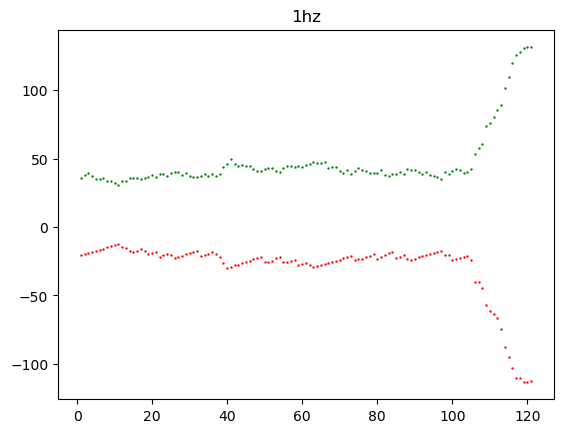

In [21]:
x = []
y1 = []
y2 = []
for i in range(len(euler1)):
    x.append(i + 1)
    y1.append(euler1[i][2]) 
    y2.append(euler2[i][2]) 

plt.title('1hz')
plt.scatter(x, y1, 0.5, color='red')
plt.scatter(x, y2, 0.5, color='green')
plt.show()